# Explore the influence of Chicago mobility on the spread of COVID-19

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Load Chicago mobility data from Apple

In [2]:
# https://www.apple.com/covid19/mobility
mobility_data = pd.read_csv('applemobilitytrends-2020-04-30.csv').set_index('region')

In [3]:
chicago_mobility = mobility_data.loc[['Chicago']].T
chicago_mobility = chicago_mobility.loc['2020-03-25':]
chicago_mobility.columns = ["driving","transit","walking"]
chicago_mobility['mobility'] = chicago_mobility['driving']+ chicago_mobility['walking']+ chicago_mobility['transit']
chicago_mobility.to_csv("mobility.csv")

## Load Cook county case data (start on the day when total case exceeded 1000)

In [4]:
case_data = pd.read_csv('us-counties.csv').set_index('county')
cook_case = case_data[case_data['state'] == 'Illinois'].loc[['Cook']].set_index('date')
cook_new_case = pd.DataFrame(cook_case[cook_case['cases']>1000]['cases'].diff())
cook_new_case.to_csv('new_case.csv')

## Compare these datasets (magnified the mobility to see the trend better)

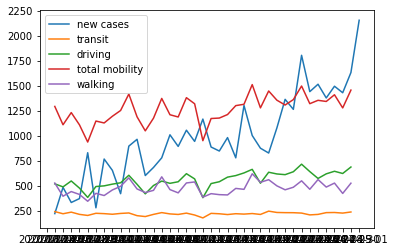

In [5]:
plt.plot(cook_new_case, label = 'new cases')
plt.plot(chicago_mobility['transit']*10, label = 'transit')
plt.plot(chicago_mobility['driving']*10, label = 'driving')
plt.plot(chicago_mobility['mobility']*10, label = 'total mobility')
plt.plot(chicago_mobility['walking']*10, label = 'walking')
plt.legend()
plt.show()

### From this plot, we can see that, especially recently, the plot of new cases has a very similar trend to the plot of total mobility. Also, the trend of walking contributes most to the total mobility.